In [1]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

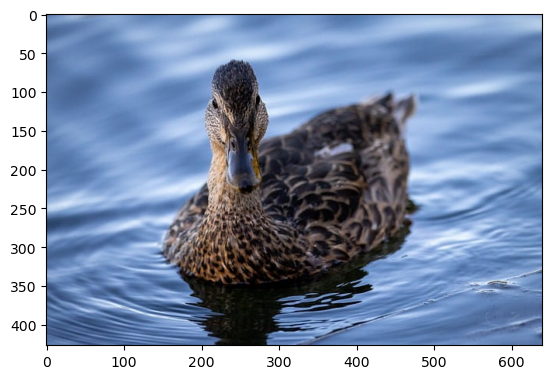

In [2]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [3]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """

   # Check if the input image has the correct shape
    assert len(im.shape) == 3, "Input image must have shape [H, W, 3]."

    # Initialize the output image with zeros
    im_conv = np.zeros(im.shape)

    # Get dimensions of input image and kernel
    im_h, im_w, im_c = im.shape
    kernel_h, kernel_w = kernel.shape

    # Get padding values for the output image
    h_pad, w_pad = int(np.floor(kernel_h/2)), int(np.floor(kernel_w/2))

    # Flip the kernel
    kernel = np.flip(kernel, 0)
    kernel = np.flip(kernel, 1)

    # Convolve Image by perform cross-correlation with the flipped kernel
    for c_id in range(im_c):
        for h_id in range(im_h - kernel_h + 1):
            for w_id in range(im_w - kernel_w + 1):
                im_patch = im[h_id:h_id+kernel_h, w_id:w_id+kernel_w, c_id]
                im_conv[h_id + h_pad, w_id + w_pad, c_id] = np.sum(kernel * im_patch)
    
    # Update the input image with the convolved image
    im = im_conv

    return im

In [4]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


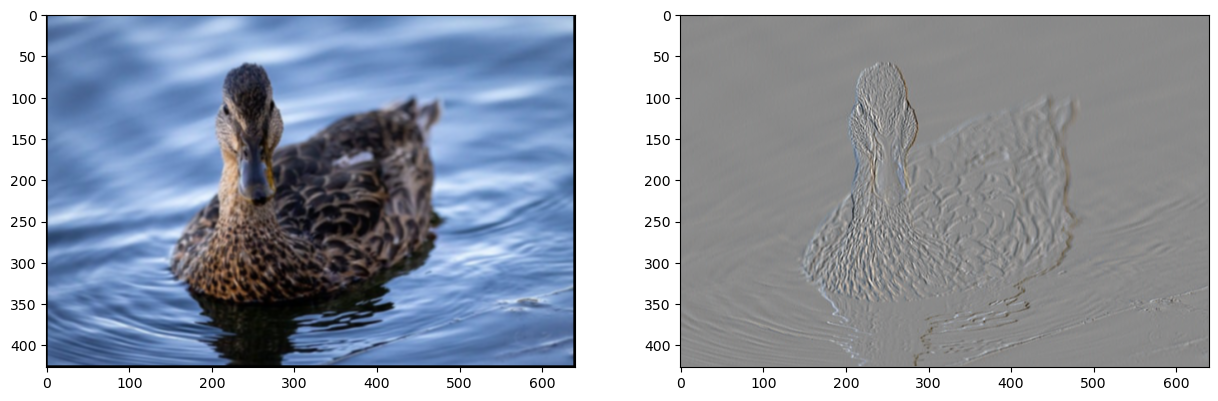

In [5]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()